In [42]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation



In [43]:
load_dotenv()

True

### Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the requests Library

In [44]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [45]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [46]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18758575,
            "total_supply": 18758575,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 31430.0,
                    "volume_24h": 21686242310,
                    "market_cap": 589632391589,
                    "percentage_change_1h": -0.272177094755288,
                    "percentage_change_24h": -1.78874914068711,
                    "percentage_change_7d": -7.48078249950434,
                    "percent_change_1h": -0.272177094755288,
                    "percent_change_24h": -1.78874914068711,
                    "percent_change_7d": -7.48078249950434
                },
                "CAD": {
                    "price": 39645.802,
                    "volume_24h": 27355026049.834,
                   

In [47]:

# Fetch current price
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37716.00
The current value of your 5.3 ETH is $9933.58


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [48]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [49]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [50]:

# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3589312  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62467863

In [51]:

# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [52]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [53]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings

,amount
crypto,47649.578
shares,40938.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

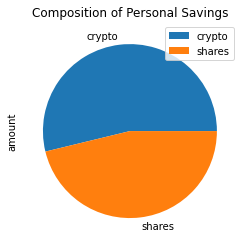

In [54]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [55]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


### Part 2 - Retirement Planning

In [56]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [57]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                          SPY           \
              open      high     low    close    volume    open     high   
2020-05-28  117.14  117.3500  112.24  117.330  18488400  304.65  306.840   
2020-05-29  117.43  117.7100  117.32  117.670  16292692  302.46  304.960   
2020-06-01  117.35  117.3999  117.24  117.365  10635820  303.62  306.205   
2020-06-02  117.38  117.4700  117.31  117.450   7837090  306.55  308.130   
2020-06-03  117.26  117.4100  117.06  117.160  11554888  310.24  313.220   

                                         
               low     close     volume  
2020-05-28  302.24  302.9600  159401239  
2020-05-29  299.47  304.1600  200312312  
2020-06-01  303.06  305.5800   92628393  
2020-06-02  305.10  308.1300  131833888  
2020-06-03  309.94  312.2117  157657617

In [58]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [59]:

# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                       SPY  \
              open      high     low    close    volume daily_return    open   
2020-05-28  117.14  117.3500  112.24  117.330  18488400          NaN  304.65   
2020-05-29  117.43  117.7100  117.32  117.670  16292692     0.002898  302.46   
2020-06-01  117.35  117.3999  117.24  117.365  10635820    -0.002592  303.62   
2020-06-02  117.38  117.4700  117.31  117.450   7837090     0.000724  306.55   
2020-06-03  117.26  117.4100  117.06  117.160  11554888    -0.002469  310.24   

                                                               
               high     low     close     volume daily_return  
2020-05-28  306.840  302.24  302.9600  159401239          NaN  
2020-05-29  304.960  299.47  304.1600  200312312     0.003961  
2020-06-01  306.205  303.06  305.5800   92628393     0.004669  
2020-06-02  308.130  305.10  308.1300  131833888     0.008345  
2020-06-03  313.220  309.94  312.2117  157657617     0.013247

In [60]:

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001834,0.995284,0.988232,1.007181,1.005297,0.993998,1.007864,0.993614,1.006564,1.007455,...,1.006153,0.998777,0.999399,0.988808,0.993914,0.998271,1.005380,0.994619,1.007041,1.013014
2,1.008243,0.993225,0.983012,1.020245,0.991070,0.989790,1.001726,1.004597,1.020877,1.013619,...,0.999326,0.995655,1.002026,0.989836,0.998162,0.998312,0.994339,0.997684,1.018734,1.012305
3,1.011417,0.997319,0.995678,1.018517,0.988737,0.990910,1.013928,0.995760,1.020209,1.008309,...,0.996128,0.998327,1.001124,1.000135,1.010421,1.004524,1.006382,0.993147,1.019332,1.013634
4,1.009651,0.997241,0.992875,1.028562,0.979626,0.967830,1.011458,0.984474,1.034435,1.003569,...,0.995663,0.991784,0.998148,0.995440,1.011575,0.998762,1.018594,0.991603,1.025461,1.013208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,851.503406,637.910234,420.436386,1166.396378,1307.573347,1275.853253,842.601893,333.439096,685.389415,1110.807371,...,2053.580731,1933.535756,996.876679,348.390575,1572.688516,375.413431,1193.991526,1401.522834,2718.918230,1958.202243
7557,860.819236,635.514587,423.075945,1157.439194,1296.067429,1291.213174,855.935290,332.745912,678.152079,1121.795574,...,2030.598209,1935.357866,1002.591358,346.569670,1554.095195,375.249511,1189.693880,1393.924205,2722.488909,1958.835484
7558,857.798101,633.885155,424.052936,1160.176293,1299.300225,1294.244162,856.142746,330.965892,690.999191,1134.700105,...,2070.685253,1948.119368,997.229362,346.397832,1550.951420,376.566493,1192.678002,1386.836117,2750.507964,1957.295365
7559,860.242452,637.868279,423.576451,1144.389973,1295.082578,1303.921774,863.522052,334.873686,693.447173,1144.440226,...,2056.617744,1954.459863,994.279093,348.056254,1527.787437,373.745071,1175.995927,1410.781395,2746.150629,1963.500277


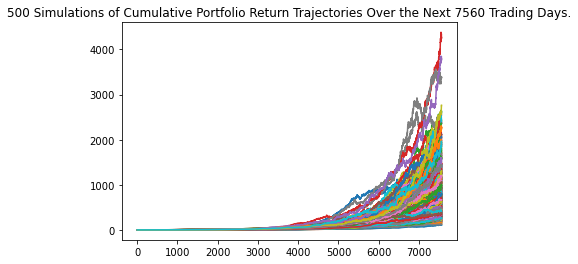

In [84]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

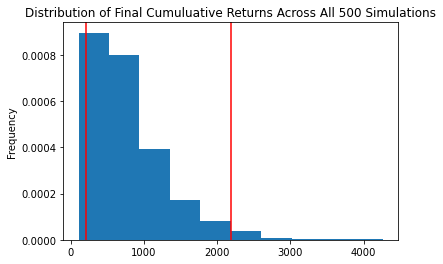

In [82]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count            500.000000
mean             803.279009
std              544.430066
min              107.418403
25%              418.462523
50%              658.705438
75%             1042.455314
max             4261.291384
95% CI Lower     203.345573
95% CI Upper    2190.018108
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [64]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $4066911.45 and $43800362.15


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [65]:
# Set initial investment
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $6100367.18 and $65700543.23


### Optional Challenge - Early Retirement
Five Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open      high     low    close    volume daily_return    open   
2020-05-28  117.14  117.3500  112.24  117.330  18488400          NaN  304.65   
2020-05-29  117.43  117.7100  117.32  117.670  16292692     0.002898  302.46   
2020-06-01  117.35  117.3999  117.24  117.365  10635820    -0.002592  303.62   
2020-06-02  117.38  117.4700  117.31  117.450   7837090     0.000724  306.55   
2020-06-03  117.26  117.4100  117.06  117.160  11554888    -0.002469  310.24   

                                                               
               high     low     close     volume daily_return  
2020-05-28  306.840  302.24  302.9600  159401239          NaN  
2020-05-29  304.960  299.47  304.1600  200312312     0.003961  
2020-06-01  306.205  303.06  305.5800   92628393     0.004669  
2020-06-02  308.130  305.10  308.1300  131833888     0.008345  
2020-06-03  313.220  309.94  312.2117  157657617     0.013247

In [67]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988700,0.994837,0.993325,1.006359,1.002805,0.999756,0.991059,1.008582,0.999720,1.005494,...,0.993008,1.005251,0.999601,1.000280,0.997335,0.999980,0.986290,0.997068,1.011680,0.998856
2,1.001026,0.990583,0.988894,1.020281,1.011230,0.998098,1.003351,1.015405,0.995821,1.015666,...,0.996657,1.014645,1.006171,0.998940,1.002921,1.001636,0.989464,1.002652,1.021233,1.009781
3,0.998663,0.984739,0.998360,1.022647,1.009936,0.999474,1.014370,1.026297,0.978296,1.018252,...,0.995331,1.006758,1.001648,1.019502,1.008353,0.993442,0.987772,1.007014,1.027699,1.005818
4,1.001782,0.993947,1.003679,1.025443,0.999145,0.998079,1.017827,1.023440,0.980040,1.015678,...,1.009615,1.027377,0.994222,1.019862,1.012815,0.988384,0.984802,1.020858,1.021878,1.010390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.583263,4.165408,5.482062,4.502799,2.984581,2.872463,3.585574,4.408156,4.095438,2.651461,...,2.758309,2.139225,2.671502,2.632648,2.497776,2.141786,2.769030,2.456979,2.710838,2.112018
1257,2.594467,4.162663,5.442335,4.460769,2.985091,2.856842,3.547083,4.440696,4.084949,2.648689,...,2.746821,2.125523,2.697526,2.628898,2.498038,2.158319,2.774485,2.500443,2.735724,2.097216
1258,2.599425,4.181349,5.467270,4.491777,2.917662,2.870628,3.539807,4.463270,4.076579,2.648750,...,2.750799,2.120128,2.680152,2.651104,2.506834,2.152922,2.783725,2.502800,2.699236,2.094498
1259,2.587170,4.234982,5.373750,4.520060,2.924562,2.923532,3.559727,4.471653,4.081225,2.656907,...,2.716145,2.111830,2.662675,2.641644,2.516949,2.173432,2.803495,2.498498,2.710899,2.109082


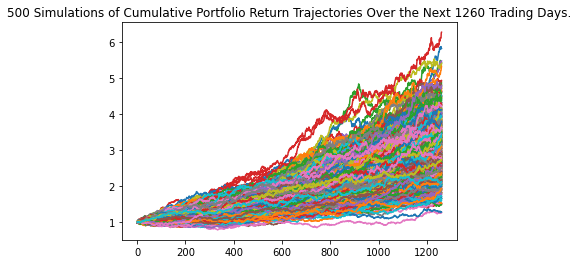

In [68]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

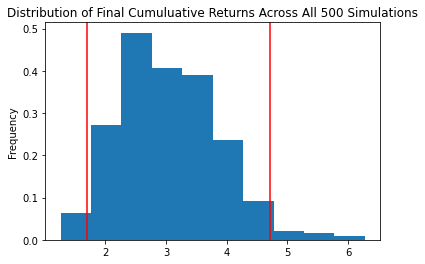

In [69]:

# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              3.050969
std               0.802422
min               1.261052
25%               2.472385
50%               2.938016
75%               3.560268
max               6.279298
95% CI Lower      1.691722
95% CI Upper      4.715091
Name: 1260, dtype: float64


In [71]:
# Set initial investment
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $101503.31 and $282905.44


### Ten Years Retirement Option

In [72]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open      high     low    close    volume daily_return    open   
2020-05-28  117.14  117.3500  112.24  117.330  18488400          NaN  304.65   
2020-05-29  117.43  117.7100  117.32  117.670  16292692     0.002898  302.46   
2020-06-01  117.35  117.3999  117.24  117.365  10635820    -0.002592  303.62   
2020-06-02  117.38  117.4700  117.31  117.450   7837090     0.000724  306.55   
2020-06-03  117.26  117.4100  117.06  117.160  11554888    -0.002469  310.24   

                                                               
               high     low     close     volume daily_return  
2020-05-28  306.840  302.24  302.9600  159401239          NaN  
2020-05-29  304.960  299.47  304.1600  200312312     0.003961  
2020-06-01  306.205  303.06  305.5800   92628393     0.004669  
2020-06-02  308.130  305.10  308.1300  131833888     0.008345  
2020-06-03  313.220  309.94  312.2117  157657617     0.013247

In [73]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002060,0.998897,0.998658,1.019674,0.992950,1.008741,0.996000,1.000606,1.000116,0.997732,...,1.013689,1.001774,1.010139,0.995898,1.004123,0.987492,1.010379,0.998312,1.010506,1.006619
2,1.007512,0.998072,1.007403,1.020903,0.989938,1.013833,1.006142,0.994650,0.999197,0.997085,...,1.013452,1.004280,1.012618,0.994719,1.011583,0.994967,1.009836,0.991897,1.012796,1.014139
3,1.011123,0.998489,1.006024,1.030453,0.980054,1.007168,1.003822,1.001339,0.987991,0.997223,...,1.009146,1.006004,1.012509,0.980705,1.027047,0.988466,1.005968,0.988510,1.006453,1.019649
4,0.997318,1.002463,1.000460,1.040914,0.980846,0.991215,1.001297,1.006757,0.995128,0.994034,...,1.013342,1.010696,1.021099,0.981456,1.027667,0.995584,1.009552,1.002673,1.003504,1.014101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.871564,6.603195,6.529285,11.021093,7.749780,10.525220,10.693630,5.003863,13.734272,10.714108,...,6.269067,8.123955,8.528359,4.167876,10.305084,4.735881,6.792392,11.046672,10.541985,6.812932
2517,7.832435,6.575117,6.571730,11.063426,7.792519,10.505755,10.597831,5.053931,13.621344,10.679927,...,6.199989,8.031692,8.552341,4.147853,10.358955,4.745041,6.815062,11.019514,10.491758,6.862415
2518,7.904656,6.684556,6.579061,11.032472,7.866001,10.487724,10.547192,5.096098,13.510927,10.780638,...,6.247215,8.037501,8.568057,4.163498,10.331492,4.790964,6.790287,11.121581,10.486939,6.819149
2519,7.913274,6.614342,6.589598,11.118728,7.893258,10.487709,10.672658,5.119342,13.596092,10.775374,...,6.247447,8.044102,8.622102,4.172698,10.344529,4.776343,6.865712,11.232569,10.449446,6.776240


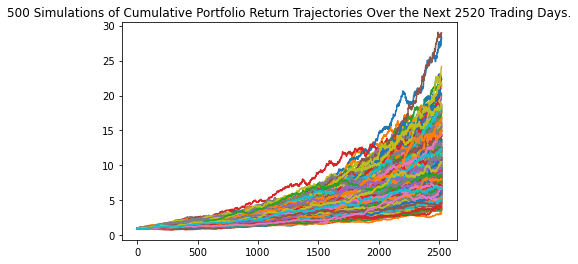

In [74]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

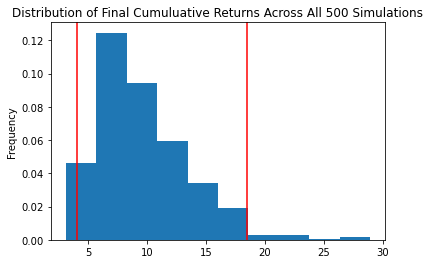

In [75]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              9.624370
std               3.950775
min               3.079980
25%               6.835316
50%               8.836779
75%              11.586795
max              28.930128
95% CI Lower      4.017139
95% CI Upper     18.498370
Name: 2520, dtype: float64


In [78]:
# Set initial investment
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $241028.37 and $1109902.2
